In [1]:
# This file takes the swimbladder data and plots it according to the drug groups
# Written by Kevin Li, May 2025

import csv
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
def read_csv_to_numpy(filename):
    try:
        data = np.genfromtxt(filename, delimiter=',', skip_header=1, dtype=None, encoding=None)
        return data
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

In [3]:
# Extracting data from our CSV
data = read_csv_to_numpy('swimbladder_data.csv')
z = []
top = []
side = []
vol = []

nicer = []
cmp = []
control = []
for i in range(len(data)):
    z.append(data[i][1])
    top.append(data[i][3])
    side.append(data[i][4])
    vol.append(data[i][2])

z = np.asarray(z)
top = np.asarray(top)
side = np.asarray(side)
vol = np.asarray(vol)

# The following calculations are accounting for the slight change in magnification due to the fishes position in z
d = 238 - (720-z)/400 * 5
m = 25/(d - 25)
vol_mm = ((1.1/m)**3 * vol)/(1000**3)
z_mm = (720 - z)/400 * 5

# Sorting the wells into their respective drug groups
for i in range(len(data)):
    name = int(data[i][0][1:])
    if name == 3 or name == 5:
        cmp.append((z_mm[i], vol_mm[i]))
    elif name == 7 or name == 9:
        nicer.append((z_mm[i], vol_mm[i]))
    elif name == 1 or name == 11:
        control.append((z_mm[i], vol_mm[i]))

nicer = np.array(nicer)
cmp = np.array(cmp)
control = np.array(control)

# Plotting and fitting the data
zlin = np.linspace(0, 6, 100)
coeffs, cov = np.polyfit(z_mm**3, vol_mm, deg=1, cov=True)  
trend_line = np.poly1d(coeffs)
y_trend = trend_line(zlin)
residuals = vol_mm - trend_line(z_mm)
std_dev = np.std(residuals, ddof=2)
error_margin = 2*std_dev  # Adjust this value based on variance
y_upper = y_trend + error_margin
y_lower = y_trend - error_margin
y_pred = np.polyval(coeffs, z_mm)


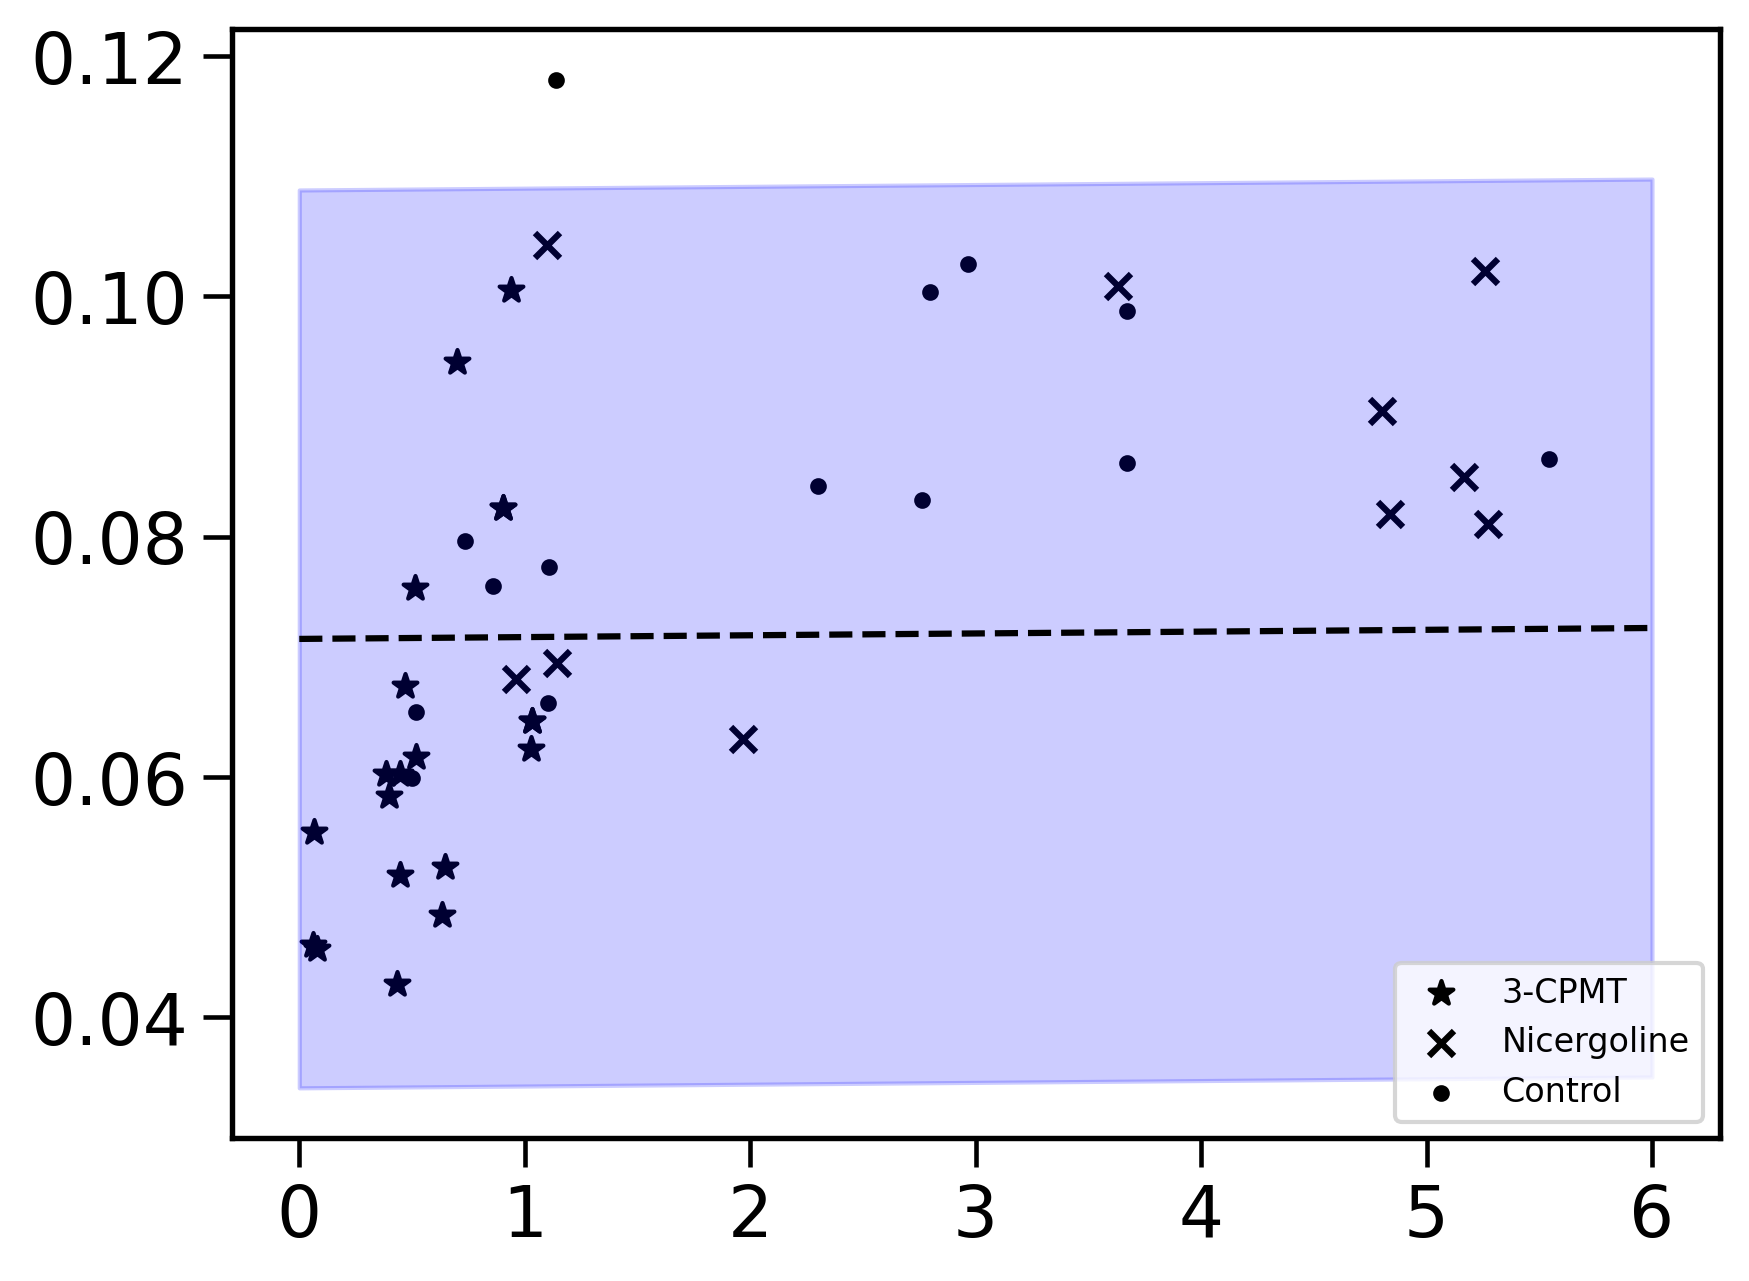

In [ ]:
# Plotting for visualization purposes

plt.figure(dpi=300)
mpl.rcParams['font.size'] = 8
mpl.rcParams['axes.linewidth'] = 1.3
mpl.rcParams['xtick.major.width'] = 1.1
mpl.rcParams['ytick.major.width'] = 1.1
mpl.rcParams['xtick.minor.width'] = 0.9
mpl.rcParams['ytick.minor.width'] = 0.9
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['ytick.minor.size'] = 3
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.scatter(cmp[:, 0], cmp[:,1], marker = '*', color = 'black', label = "3-CPMT")
plt.scatter(nicer[:, 0], nicer[:,1], marker = 'x', color = 'black', label = "Nicergoline")
plt.scatter(control[:, 0], control[:,1], marker = '.', color = 'black', label = "Control")
plt.plot(zlin, y_trend, color='black', linestyle='--')
plt.fill_between(zlin, y_lower, y_upper, color='blue', alpha=0.2)
# plt.tick_params(axis='x', which='both', labelbottom=False)  # Remove x-axis tick labels
# plt.tick_params(axis='y', which='both', labelleft=False)    # Remove y-axis tick labels
plt.legend(loc="lower right")
plt.savefig('SwimbladderTrendLine')

plt.show()

